# Tema 5: Detección de líneas

En este cuaderno se desarrollan los ejemplos prácticos referentes al tema de expocisión, la intención es conocer algunas funcionalidades y herramientas que se utilizan con regularidad en procesos de visión computacional, específicamente para la detección de líneas.

**Objetivos**
* Implementar de manera práctica filtros en imágenes para la detección de líneas.
* Utilizar OpenCV como principal líbreria y conocer algunas de sus funciones.
* Analizar el proceso matemático que utilizan los filtros de detección de líneas.

In [1]:
import cv2
cv2.__version__

'4.8.0'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
imagen_prueba = cv2.imread("edificio.jpg", cv2.COLOR_BGR2RGB)
imagen_prueba.shape

(385, 528, 3)

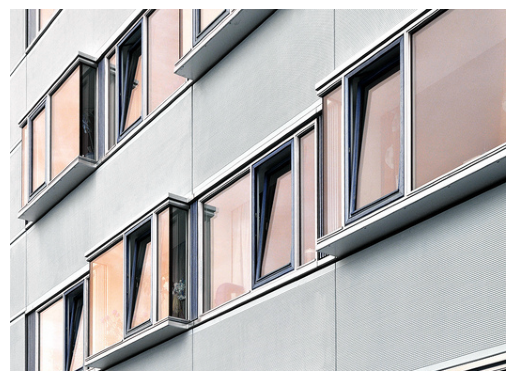

In [42]:
plt.imshow(imagen_prueba)
plt.axis("off");

Para esta práctica se trabajará con la imagen en escala de grises, por lo que realizamos la transformación de RGB.

In [43]:
imagen_gray = cv2.cvtColor(imagen_prueba, cv2.COLOR_BGR2GRAY)
imagen_gray.shape

(385, 528)

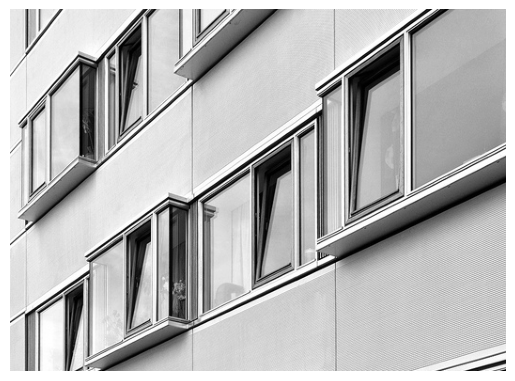

In [44]:
plt.imshow(imagen_gray, cmap="gray")
plt.axis("off");

## LSD: Line Segments Detector

Ahora que tenemos la imagen en escala de grises podemos utilizar la función integrada en OpenCV LineSegmentsDetector() para crear una función personalizada que nos permita detectar las líneas en la imagen.

In [74]:
def mostrar_imagenes(imagen_original, imagen_lineas):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
    ax1.imshow(imagen_original)
    ax2.imshow(imagen_lineas)
    ax1.set_title("Imagen original")
    ax2.set_title("Imagen con LSD aplicado")
    ax1.axis('off')
    ax2.axis('off');

def detectar_lineas(imagen_path):   
    imagen = cv2.imread(imagen_path, cv2.COLOR_BGR2RGB)    
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    lsd = cv2.createLineSegmentDetector()
    lineas, widths, _, _ = lsd.detect(gray)
    
    line_image = np.copy(imagen)
    
    if lineas is not None:
        lineas = lineas.reshape((-1, 4))
        for x1, y1, x2, y2 in lineas:
                cv2.line(line_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                
    return line_image    

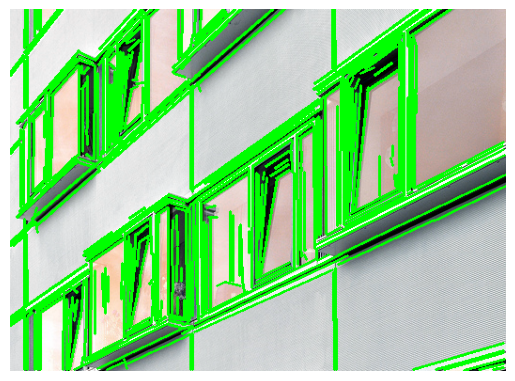

In [70]:
imagen_lineas = detectar_lineas("edificio.jpg")

plt.imshow(imagen_lineas)
plt.axis("off");

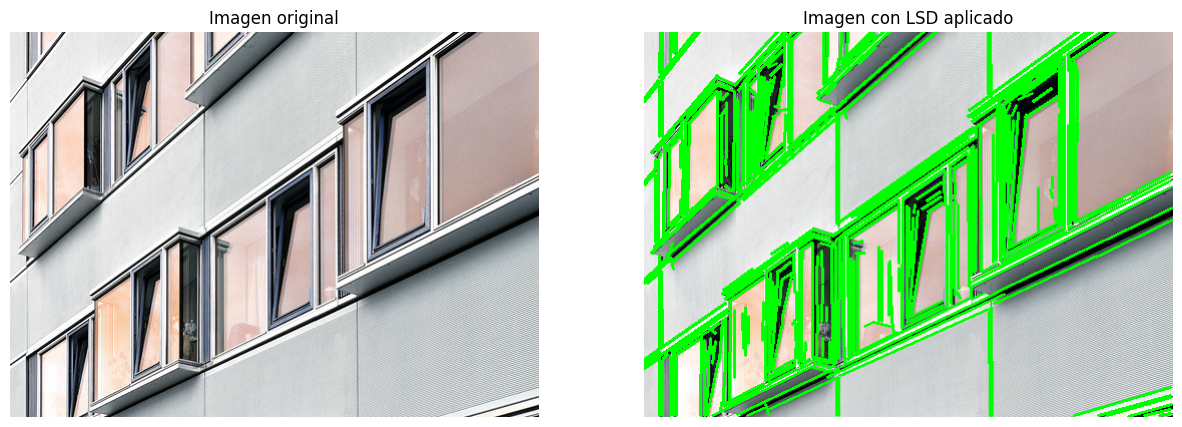

In [75]:
mostrar_imagenes(imagen_prueba, imagen_lineas)